Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 64)          57664     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 32)          6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1000, 16)          1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
______________________

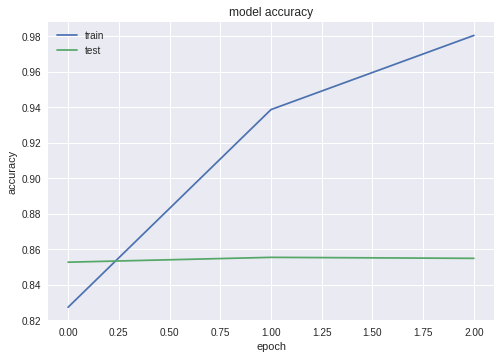

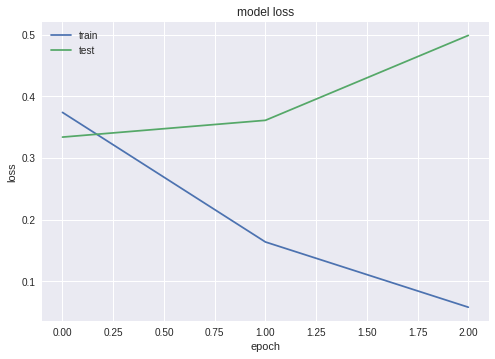

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
import os
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
#max_review_length = 1600
#max_review_length = 400
max_review_length = 1000
#max_review_length = 3000
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64)
history = model.fit(X_train, y_train, epochs=3, batch_size=64,validation_data=(X_test, y_test))

# Evaluation on the test set
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#plot model layers
plot_model(model)
SVG(model_to_dot(model).create(prog='dot', format='svg'))
history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()